In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Land data 

In [2]:
data_land = pd.read_csv("../data/1850-2024-Land.csv")

### 1.1 Handling missing values

In [3]:
data_land.replace(-999, pd.NA)

median_anomaly = data_land["Anomaly"].median()
data_land["Anomaly"] = data_land["Anomaly"].fillna(data_land["Anomaly"].median())

### 1.2 Data cleaning

In [4]:
data_land.dtypes

Date         int64
Anomaly    float64
dtype: object

In [5]:
data_land['Date'] = pd.to_datetime(data_land['Date'].astype(str), format='%Y%m')

### 1.3 Normalization

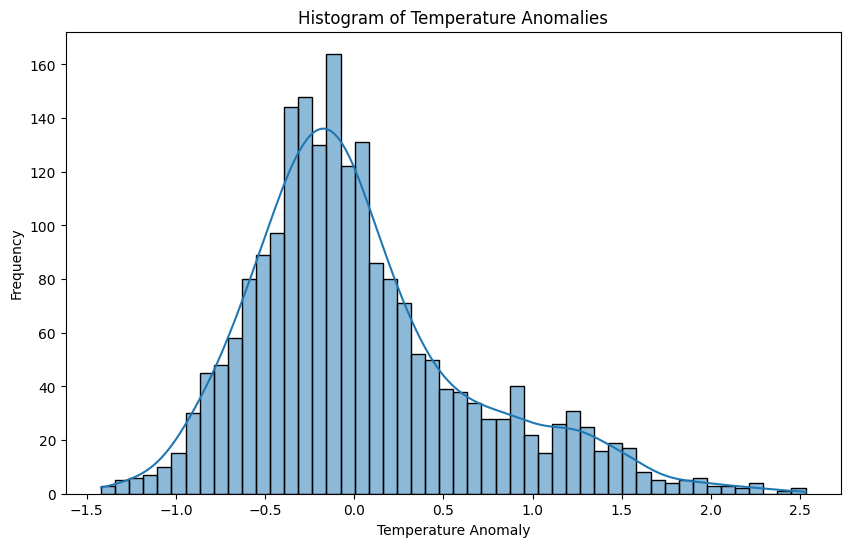

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data_land['Anomaly'], bins=50, kde=True)
plt.title('Histogram of Temperature Anomalies')
plt.xlabel('Temperature Anomaly')
plt.ylabel('Frequency')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

# scaler = MaxAbsScaler()
# data_land['Anomaly'] = scaler.fit_transform(data_land[['Anomaly']])

### 1.4 Feature Engineering

In [8]:
data_land['Anomaly -1'] = data_land['Anomaly'].shift(1)
data_land['Anomaly -2'] = data_land['Anomaly'].shift(2)
data_land['Anomaly -3'] = data_land['Anomaly'].shift(3)

data_land["Diff Anomaly -1"] = data_land['Anomaly'] - data_land["Anomaly -1"]
data_land["Diff Anomaly -2"] = data_land['Anomaly'] - data_land["Anomaly -2"]
data_land["Diff Anomaly -3"] = data_land['Anomaly'] - data_land["Anomaly -3"]

data_land = data_land.dropna()

### 1.5 Saving data

In [9]:
data_land.to_csv("../data/1850-2024-Land-preprocessed.csv")

# 2. Ocean data

In [10]:
data_ocean = pd.read_csv("../data/1850-2024-Ocean.csv")

### 2.1 Handling missing values

In [11]:
data_ocean.replace(-999, pd.NA)

median_anomaly = data_ocean["Anomaly"].median()
data_ocean["Anomaly"] = data_ocean["Anomaly"].fillna(data_ocean["Anomaly"].median())

### 2.2 Data cleaning

In [12]:
data_ocean.dtypes

Date         int64
Anomaly    float64
dtype: object

In [13]:
data_ocean['Date'] = pd.to_datetime(data_ocean['Date'].astype(str), format='%Y%m')

### 2.3 Normalization

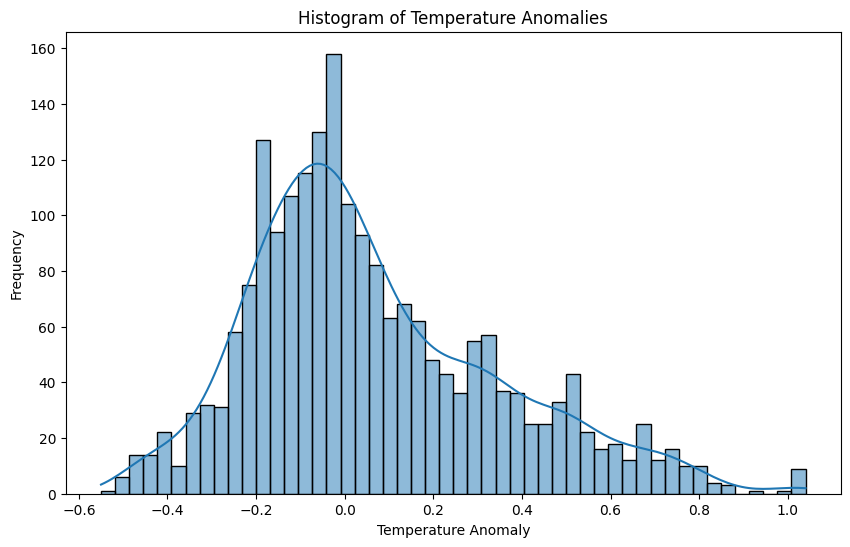

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data_ocean['Anomaly'], bins=50, kde=True)
plt.title('Histogram of Temperature Anomalies')
plt.xlabel('Temperature Anomaly')
plt.ylabel('Frequency')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

# scaler = MaxAbsScaler()
# data_ocean['Anomaly'] = scaler.fit_transform(data_ocean[['Anomaly']])

### 2.4 Feature engineering

In [16]:
data_ocean['Anomaly -1'] = data_ocean['Anomaly'].shift(1)
data_ocean['Anomaly -2'] = data_ocean['Anomaly'].shift(2)
data_ocean['Anomaly -3'] = data_ocean['Anomaly'].shift(3)

data_ocean["Diff Anomaly -1"] = data_ocean['Anomaly'] - data_ocean["Anomaly -1"]
data_ocean["Diff Anomaly -2"] = data_ocean['Anomaly'] - data_ocean["Anomaly -2"]
data_ocean["Diff Anomaly -3"] = data_ocean['Anomaly'] - data_ocean["Anomaly -3"]

data_ocean = data_ocean.dropna()

### 2.5 Saving data

In [17]:
data_ocean.to_csv("../data/1850-2024-Ocean-preprocessed.csv")